# **TÌM KIẾM INSIGHT CỦA DỮ LIỆU**
---

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as gp

In [15]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,Age,Sex,Race,Marital status,Education,Employement,Incomes,Number of books read,Printed books?,Audiobooks?,E-books?,Source of the last book read,Daily news/newspapers reader?,Magazines/Journals Reader?
0,46,Male,Native American,Married,High school,Employed full-time,1,97,Yes,Yes,Yes,Purchased,Yes,Yes
1,32,Male,Mixed race,Never been married,High school,Employed full-time,1,97,No,Yes,Yes,Borrowed from others,Yes,Yes
2,27,Male,Mixed race,Married,High school,Employed full-time,5,97,Yes,No,Yes,Borrowed from library,Yes,No
3,16,Female,Mixed race,Never been married,Some high school,Employed part-time,2,97,Yes,Yes,No,Purchased,Yes,No
4,55,Female,Asian/Pacific Islander,Divorced,Some college,Self-employed,5,97,Yes,Yes,Yes,Purchased,No,No


## CÂU 1. SỐ LƯỢNG SÁCH ĐỌC THAY ĐỔI NHƯ THẾ NÀO THEO MỨC THU NHẬP VÀ GIỚI TÍNH?

### 1. Lợi ích của việc trả lời câu hỏi

- Trả lời câu hỏi này giúp tìm hiểu xem mức thu nhập ảnh hưởng tới sự thay đôi thói quen đọc sách của nam và nữ như thế nào? Liệu nam giới hoặc nữ giới có thích đọc sách hơn giới tính còn lại hay không. Từ đó phát triển chiến lược tiếp thị phù hợp với từng cá nhân theo độ tuổi và mức thu nhập.

### 2. Tiền xử lý

- Để trả lời câu hỏi này, nhóm sử dụng dữ liệu của cột **Incomes**, **Sex** và **Number of books read**.

- Thuật toán được thực hiện theo các bước sau:
    
    + Nhóm dữ liệu theo **Incomes** và **Sex** để tính tổng số sách đọc theo mức thu nhập của từng giới tính.

    + Tạo 1 dataframe mới với 3 cột là **Incomes**, **Male** và **Female** với dữ liệu của **Male** và **Female** là số sách đọc theo mức thu nhập của 3 giới tính nam và nữ. 

In [16]:
# Tạo bảng thống kê số lượng sách của Nam và Nữ theo Income Range
book_counts = df.groupby(['Incomes', 'Sex'])['Number of books read'].mean().reset_index()

book_counts_by_incomes = book_counts.pivot(index= 'Incomes', columns = 'Sex', values='Number of books read')
book_counts_by_incomes.reset_index(inplace=True)
book_counts_by_incomes.columns.name = None  # Xóa tên cấp cột

# Làm tròn thành số nguyên
book_counts_by_incomes = book_counts_by_incomes.round(0).astype(int)
book_counts_by_incomes

,Incomes,Female,Male
0,1,16,24
1,2,20,18
2,3,22,15
3,4,23,12
4,5,20,17
5,6,23,17
6,7,22,15
7,8,25,16


### 3. Trực quan

In [17]:
y_incomes = book_counts_by_incomes['Incomes']
x_M = book_counts_by_incomes['Male'] * (-1)
x_F = book_counts_by_incomes['Female']

fig = gp.Figure() 
  
# Add Male data
fig.add_trace(gp.Bar(y= y_incomes, x = x_M,  
                     name = 'Male',  
                     orientation = 'h')) 

# Add Female data
fig.add_trace(gp.Bar(y = y_incomes, x = x_F, 
                     name = 'Female', orientation = 'h'))

# Updating the layout for our graph 
fig.update_layout(title = 'Population Pyramid', 
                 title_font_size = 22, barmode = 'relative', 
                 bargap = 0.0, bargroupgap = 0, 
                 xaxis = dict(tickvals = [-30, -25, -20, -15, -10, -5, 
                                          0, 5, 10, 15, 20, 25, 30], 
                                
                              ticktext = ['30', '25', '20', '15', '10', '5', 
                                          '0', '5', '10', '15', '20', '25', '30'], 
                                
                              title = 'Average Number of books read', 
                              title_font_size = 14) 
                 ) 
  
fig.show()

### 4. Nhận xét và rút ra kết luận.

Nhận xét:

- Với mức thu nhập thấp nhất tương ứng thu nhập nằm trong khoảng dưới $10000, nam giới đọc nhiều sách hơn nữ giới với trung bình só cuốn sách đọc trong 1 năm là  24 cuốn, gấp 1.6 lần nữ giới với số cuốn sách đọc trung bình là 15 cuốn. 

- Với mức thu nhập cao hơn, nữ giới đọc nhiều sách hơn nam giới. Sự chệnh lệch này giao động từ gấp 1.17 lần tới 1.91 lần. 

Kết luận: Nhìn chung, nữ giới có xu hướng đọc nhiều sách hơn nam giới. Khi thu nhập càng cao, sự khác biệt đó càng tăng. Điều này cho thấy nữ giới có xu hướng đọc sách để nâng cấp bản thân khi ở mức thu nhập cao hơn nam giới.

## CÂU 2: MỨC ĐỘ QUAN TÂM TỚI CÁC ẤN PHẨM ĐỊNH KỲ CÓ SỰ KHÁC BIỆT THEO ĐỘ TUỔI VÀ TRÌNH ĐỘ HỌC VẤN NHƯ THẾ NÀO?

### 1. Lợi ích của việc trả lời câu hỏi

- Tìm hiểu về mức độ quan tâm tới các ấn phẩm định kỳ giúp hiểu được thói quen đọc các thể loại sách báo, tạp chí của từng lứa tuổi và trình độ học vấn, từ đó xác định xem độ tuổi và trình độ học vấn nào ưa thích các loại ấn phẩm này.

- Việc khám phá sở thích đọc sách báo của mỗi người giúp cho các nhà phát hành sách và bản tin có chiến lược phù hợp để đưa nguồn sách này tiếp cận tới đúng đối tượng quan tâm nó.

### 2. Tiền xử lý

- Để trả lời câu hỏi này, nhóm sử dụng thông tin của các cột **Daily news/newspapers reader?**, **Magazines/Journals Reader?**, ***Age** và **Education**.

- Thuật toán sẽ theo các bước sau:

    + Nhóm độ tuổi theo các nhóm tuổi [(15-25), (25-35), (35-45), (45-55), (55-65), (65-75), (75-85), (85-95)].

    + Tạo dataframe chứa thông tin về hành vi đọc các ấn phẩm theo kỳ theo độ tuổi và trình độ học vấn.

    + Nhóm số người đọc các ấn phẩm in theo nhóm tuổi và trình độ học vấn. 

    + Đặt trình độ học vấn làm index theo thứ tự tự định nghĩa cho 2 nhóm người đọc sách báo và người đọc tạp chí.

In [18]:
# Xác định khoảng giá trị (bins) và nhãn (labels)
age_bins = [15, 25, 35, 45, 55, 65, 75, 85, 95]
age_labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-95']

In [19]:
# Tạo dataframe chứa thông tin về hành vi đọc các ấn phẩm theo kỳ theo độ tuổi và trình độ học vấn
printed_media_df = pd.DataFrame()
printed_media_df['Age'] = df['Age']
printed_media_df['Daily news/newspapers reader?'] = df['Daily news/newspapers reader?']
printed_media_df['Magazines/Journals Reader?'] = df['Magazines/Journals Reader?']
printed_media_df['Education'] = df['Education']
printed_media_df['Age_Group'] = pd.cut(printed_media_df['Age'], bins=age_bins, labels=age_labels, right=False)
printed_media_df

,Age,Daily news/newspapers reader?,Magazines/Journals Reader?,Education,Age_Group
0,46,Yes,Yes,High school,45-55
1,32,Yes,Yes,High school,25-35
2,27,Yes,No,High school,25-35
3,16,Yes,No,Some high school,15-25
4,55,No,No,Some college,55-65
...,...,...,...,...,...
2101,16,No,No,Some high school,15-25
2102,16,No,No,Some high school,15-25
2103,16,Yes,No,Some high school,15-25
2104,16,No,Yes,Some high school,15-25


In [20]:
# Tạo dataframe để vẽ biểu đồ nhiêt
# 1. Lọc các giá trị Daily news/newspapers reader? = 1
newspaper_count_df = printed_media_df[printed_media_df['Daily news/newspapers reader?'] == 'Yes']

# 2. Đếm số người đọc sách in theo Education và Age
grouped_newspaper_df = newspaper_count_df.groupby(['Education', 'Age_Group']).size().reset_index(name='Count')

# 3. Tạo bảng pivot để sử dụng trong biểu đồ nhiệt
pivot_table_newspaper = grouped_newspaper_df.pivot(index='Education', columns='Age_Group', values='Count').fillna(0)

# 4. Sắp xếp theo trình độ học vấn tự định nghĩa
education_order = ['None', 'Some high school', 'High school', 'Trade school', 'Some college', 'College', 'Post-graduate']
pivot_table_newspaper.index = pd.Categorical(pivot_table_newspaper.index, categories=education_order, ordered=True)
pivot_table_newspaper.sort_index(inplace=True)
pivot_table_newspaper

Age_Group,15-25,25-35,35-45,45-55,55-65,65-75,75-85,85-95
None,3,2,2,5,1,0,0,0
Some high school,45,3,6,6,8,8,4,0
High school,39,41,30,47,53,37,17,8
Trade school,2,4,6,4,6,3,3,0
Some college,46,38,34,75,54,43,15,5
College,16,48,58,68,65,47,16,3
Post-graduate,5,43,56,48,71,46,24,2


In [21]:
# tương tự cho magazine
magazine_count_df = printed_media_df[printed_media_df['Magazines/Journals Reader?'] == 'Yes']

grouped_nagazine_df = magazine_count_df.groupby(['Education', 'Age_Group']).size().reset_index(name='Count')

pivot_table_magazine = grouped_nagazine_df.pivot(index='Education', columns='Age_Group', values='Count').fillna(0)

pivot_table_magazine.index = pd.Categorical(pivot_table_magazine.index, categories=education_order, ordered=True)
pivot_table_magazine.sort_index(inplace=True)
pivot_table_magazine

Age_Group,15-25,25-35,35-45,45-55,55-65,65-75,75-85,85-95
None,4,2,1,4,0,0,0,0
Some high school,57,2,6,6,5,8,2,0
High school,41,34,19,36,41,29,17,6
Trade school,3,4,4,6,5,2,2,0
Some college,43,34,39,64,38,32,11,4
College,14,39,68,73,58,41,13,3
Post-graduate,4,32,50,52,69,47,21,3


### 3. Trực quan

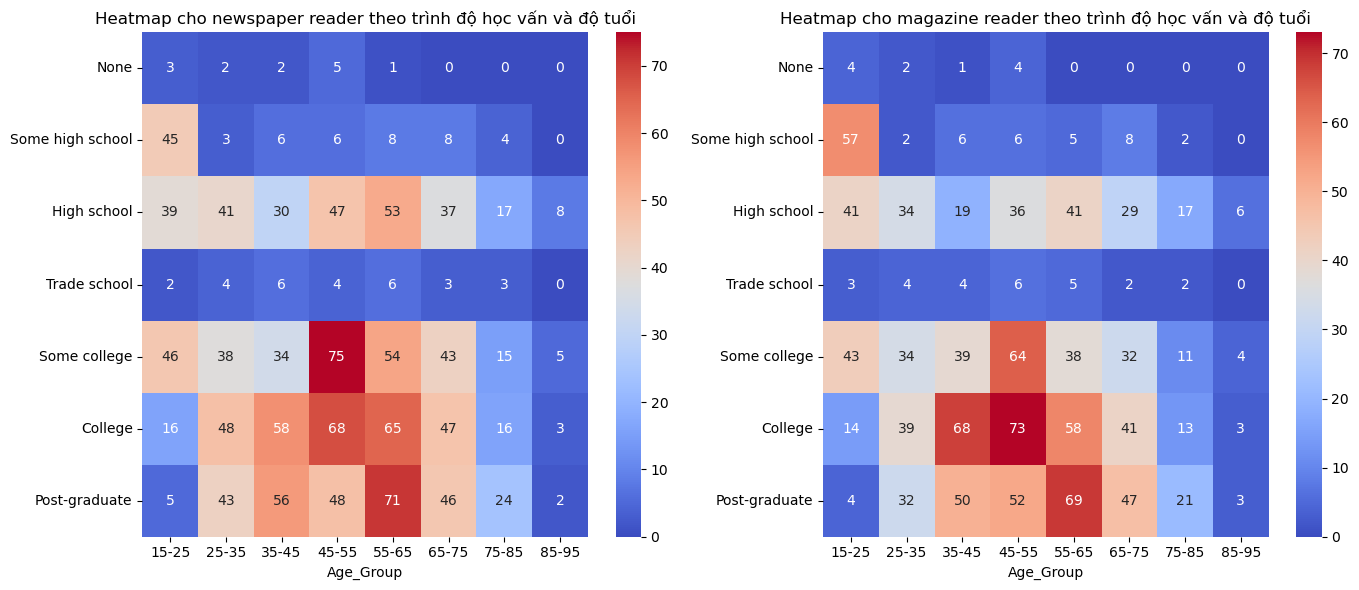

In [22]:
# 5. Vẽ biểu đồ nhiệt
# plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 hàng, 2 cột

# cho newspaper
sns.heatmap(
    pivot_table_newspaper, 
    ax=axes[0],
    cmap="coolwarm",  
    annot=True,
    fmt=".0f",
    cbar=True
)
axes[0].set_title("Heatmap cho newspaper reader theo trình độ học vấn và độ tuổi")

# cho newspaper
sns.heatmap(
    pivot_table_magazine, 
    ax=axes[1],
    cmap="coolwarm",  
    annot=True,
    fmt=".0f",
    cbar=True
)
axes[1].set_title("Heatmap cho magazine reader theo trình độ học vấn và độ tuổi")

plt.tight_layout()
plt.show()

### 4. Nhận xét và rút ra kết luận.